In [11]:
import pandas as pd
import numpy as np 
import os
import glob
import time

In [13]:
current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: C:\Users\jolen\NAPES-Home\Verify\Other\FinalFinal


In [15]:
# Assuming all your CSV files are in the same directory
# Use glob to get all CSV files
all_files = glob.glob("Data/*.csv")

# Read and merge all CSV files
dfs = []
for file in all_files:
    df = pd.read_csv(file)
    dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)

# Modify column names to remove "($/MWHr)" and any trailing spaces
merged_df.columns = merged_df.columns.str.replace(r"\(\$/MWHr\)", "", regex=True).str.strip()

# Save the modified DataFrame to a new CSV file
merged_df.to_csv("Real-Time_data.csv", index=False)

merged_df.columns



Index(['Time Stamp', 'Name', 'PTID', 'LBMP', 'Marginal Cost Losses',
       'Marginal Cost Congestion'],
      dtype='object')

In [19]:


# Assuming your dataset is loaded into a DataFrame named df
# Load the data
df = pd.read_csv('Real-Time_data.csv')

# Iterate over each unique 'PTID' value
for ptid in merged_df['PTID'].unique():
    # Filter the DataFrame for the current 'PTID'
    filtered_df = merged_df[merged_df['PTID'] == ptid]
    
    # Generate the filename for the current 'PTID'
    filename = f"{ptid}_Real_Time.csv"
    
    # Save the filtered DataFrame to a separate file
    filtered_df.to_csv(filename, index=False)
    
    print(f"Data for PTID {ptid} saved to {filename}")



Data for PTID 61757 saved to 61757_verify.csv
Data for PTID 61754 saved to 61754_verify.csv
Data for PTID 61760 saved to 61760_verify.csv
Data for PTID 61753 saved to 61753_verify.csv
Data for PTID 61844 saved to 61844_verify.csv
Data for PTID 61758 saved to 61758_verify.csv
Data for PTID 61762 saved to 61762_verify.csv
Data for PTID 61756 saved to 61756_verify.csv
Data for PTID 61759 saved to 61759_verify.csv
Data for PTID 61761 saved to 61761_verify.csv
Data for PTID 61755 saved to 61755_verify.csv
Data for PTID 61845 saved to 61845_verify.csv
Data for PTID 61846 saved to 61846_verify.csv
Data for PTID 61847 saved to 61847_verify.csv
Data for PTID 61752 saved to 61752_verify.csv


In [23]:
# Read the data from the CSV file
df = pd.read_csv("61761_Real_Time.csv")
df.columns


Index(['Time Stamp', 'Name', 'PTID', 'LBMP', 'Marginal Cost Losses',
       'Marginal Cost Congestion'],
      dtype='object')

In [25]:
import pandas as pd

# Load the data
df = pd.read_csv("61761_Real_Time.csv")

# Ensure the 'Time Stamp' column is datetime
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'])

# Extract Year, Month, and Hour from 'Time Stamp' if not present
if 'Year' not in df.columns:
    df['Year'] = df['Time Stamp'].dt.year
if 'Month' not in df.columns:
    df['Month'] = df['Time Stamp'].dt.month
if 'Day' not in df.columns:
    df['Day'] = df['Time Stamp'].dt.day
if 'Hour' not in df.columns:
    df['Hour'] = df['Time Stamp'].dt.hour

# Calculate the day number within each week (Monday=1, Sunday=7)
df['Day_of_Week'] = df['Time Stamp'].dt.dayofweek + 1   

# Create a new column 'Date' using 'Year', 'Month', and 'Day'
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Save the result to a CSV file
output_file = '61761_Real_Time.csv'
df.to_csv(output_file, index=False)

print(f"Hourly statistics with actuals saved to {output_file}")




Hourly statistics with actuals saved to 61761_Real_Time.csv


In [27]:
# Load your data
df = pd.read_csv("61761_Real_Time.csv")

# Ensure the 'Time Stamp' column is datetime
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'])

# Extract Year, Month, Day, and Hour from 'Time Stamp' if not present
if 'Year' not in df.columns:
    df['Year'] = df['Time Stamp'].dt.year
if 'Month' not in df.columns:
    df['Month'] = df['Time Stamp'].dt.month
if 'Day' not in df.columns:
    df['Day'] = df['Time Stamp'].dt.day
if 'Hour' not in df.columns:
    df['Hour'] = df['Time Stamp'].dt.hour

# Calculate the day number within each week (Monday=1, Sunday=7)
df['Day_of_Week'] = df['Time Stamp'].dt.dayofweek + 1   

# Create a new column 'Date' using 'Year', 'Month', and 'Day'
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Remove 'LBMP' column
df.drop(columns=['LBMP'], inplace=True)

# Save the result to a CSV file
output_file = '61761_Real_Time_NoLBMP.csv'
df.to_csv(output_file, index=False)

print(f"Hourly statistics with actuals saved to {output_file}")

Hourly statistics with actuals saved to 61761_Real_Time_NoLBMP.csv


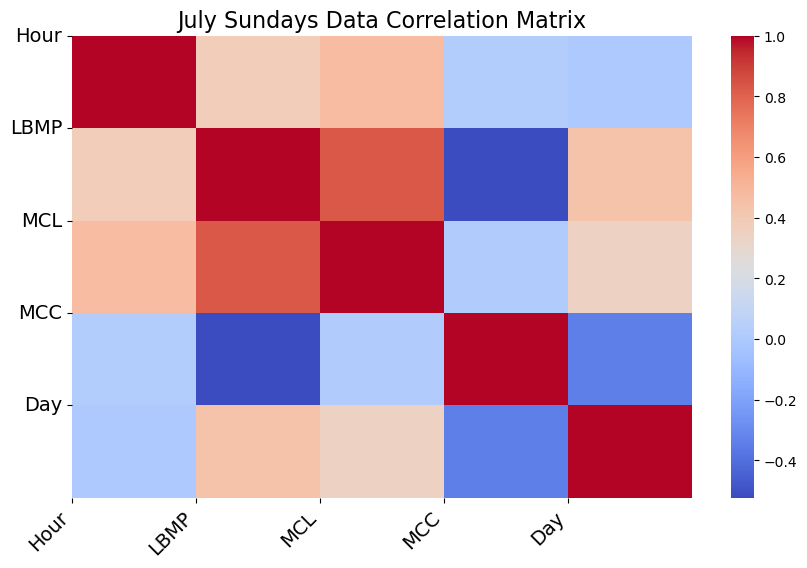

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your data
df = pd.read_csv("61761_Real_Time.csv")

# Filter data for Mondays in July for the years 2020 and 2021
sunday_data = df[(df['Month'] == 7) & (df['Day_of_Week'] == 7) & (df['Year'].isin([2020, 2021]))]

# Define the numeric columns for correlation calculation
numeric_columns = ['Hour', 'LBMP', 'Marginal Cost Losses', 'Marginal Cost Congestion', 'Day']

# Calculate the correlation matrix
corr_matrix = sunday_data[numeric_columns].corr()

# Create a dictionary to map original column names to new labels
label_mapping = {
    'Hour': 'Hour',
    'LBMP': 'LBMP',
    'Marginal Cost Losses': 'MCL',
    'Marginal Cost Congestion': 'MCC',
    'Day': 'Day'
}

# Create a heatmap to visualize the correlation matrix with increased font sizes
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")

# Set the title and label font sizes
plt.title('July Sundays Data Correlation Matrix', fontsize=16)  # Title font size

# Set custom tick labels with increased font size
plt.xticks(ticks=range(len(numeric_columns)), labels=[label_mapping[col] for col in numeric_columns], fontsize=14, rotation=45, ha="right")
plt.yticks(ticks=range(len(numeric_columns)), labels=[label_mapping[col] for col in numeric_columns], fontsize=14)

plt.show()

C:\Users\jolene.schmitz\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jolene.schmitz\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jolene.schmitz\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jolene.schmitz\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

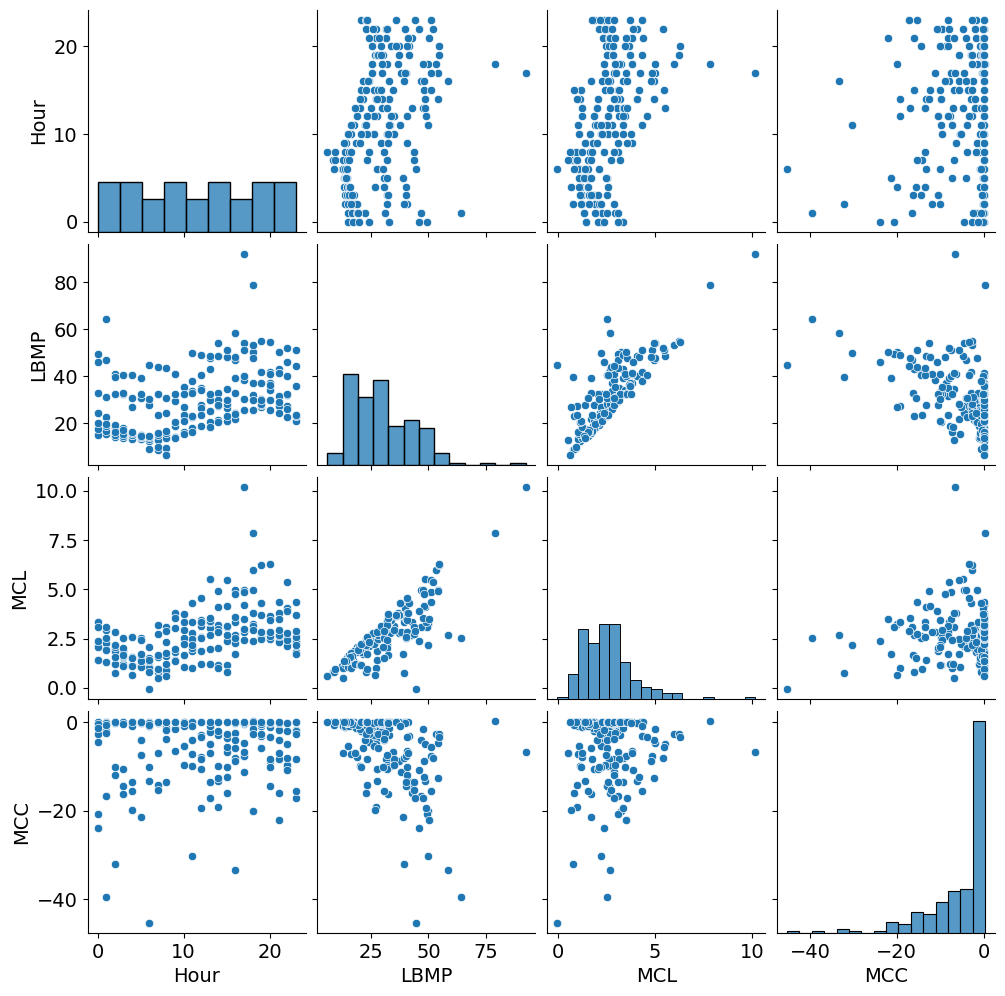

In [4]:
# Load your data
df = pd.read_csv("61761_Real_Time.csv")

# Filter data for Mondays in July for the years 2020 and 2021
sunday_data = df[(df['Month'] == 7) & (df['Day_of_Week'] == 7) & (df['Year'].isin([2020, 2021]))]

# Define the numeric columns for correlation calculation
numeric_columns2 = ['Hour', 'LBMP', 'Marginal Cost Losses', 'Marginal Cost Congestion']

# Create the pairplot
pairplot = sns.pairplot(sunday_data[numeric_columns2])

# Create a dictionary to map original column names to new labels
label_mapping = {
    'Hour': 'Hour',
    'LBMP': 'LBMP',
    'Marginal Cost Losses': 'MCL',
    'Marginal Cost Congestion': 'MCC',
}

# Rename the labels for the x and y axes in the pairplot
for ax in pairplot.axes.flatten():
    # Set new x and y labels using the mapping
    x_label = ax.get_xlabel()
    y_label = ax.get_ylabel()
    ax.set_xlabel(label_mapping.get(x_label, x_label), fontsize=14)
    ax.set_ylabel(label_mapping.get(y_label, y_label), fontsize=14)

    # Adjust tick label font size
    ax.tick_params(axis='both', labelsize=14)

plt.show()